## Decision Trees

Decision tree learning or induction of decision trees is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.

The model splits the input space into (hyper) rectangles, and predictions are made according to the area observations fall into.
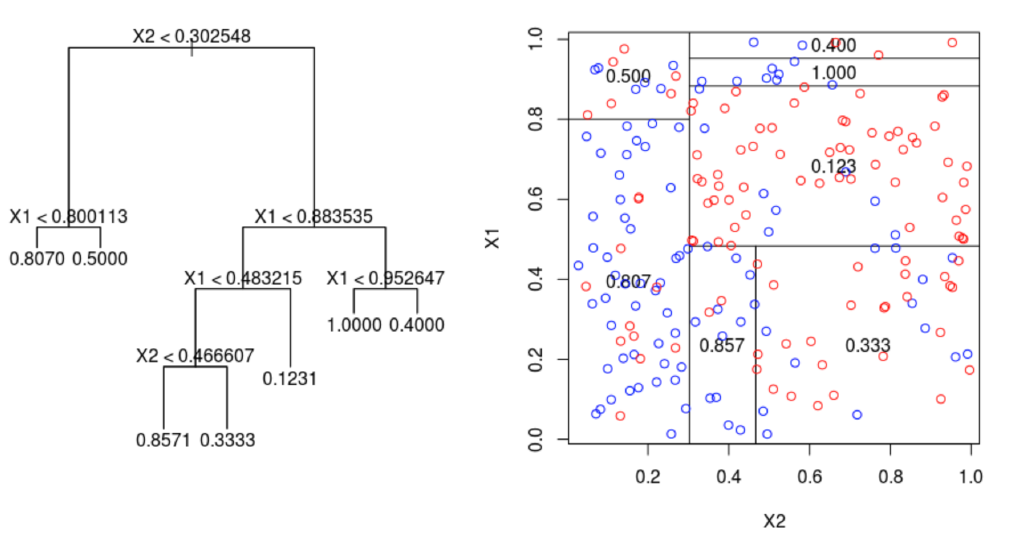


### Learning:


Learning of a CART is done by a greedy approach called recursive binary splitting of the input space:
At each step, the best predictor $X_j$ and the best cutpoint s
are selected such that $\{X|X_j < s\}$  and $\{X|X_j ≥ s\}$ 
minimizes the cost.
- For regression the cost is the Sum of Squared Error:
<h3 align="center">
$\sum_{i=1}^{n} (y_i-\hat{y})^2$
</h3>

- For classification the cost function is the Gini index:
<h3 align="center">
$G = \sum_{i=1}^{n} p_k(1-p_k)$
</h3>
    
The Gini index is an indication of how pure are the leaves, if all observations are the same type G=0 (perfect purity),
while a 50-50 split for binary would be G=0.5 (worst purity).
    
The most common **Stopping Criterion** for splitting is a minimum of training observations per node.
The simplest form of pruning is Reduced Error Pruning:
Starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected, then
the change is kept.
    
    
### Advantages:
+ Easy to interpret and no overfitting with pruning
+ Works for both regression and classification problems
+ Can take any type of variables without modifications, and do not require any data preparation

### Usecase examples:
- Fraudulent transaction classification
- Predict human resource allocation in companies

### Sample dataset.
- Format: each row is an example.
- The last column is the label.
- The first two columns are features.
- Feel free to play with it by adding more features & examples.
- The 2nd and 5th examples have the same features, but different labels - so we can see how the tree handles this case.

In [1]:
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
    ['Green', 10, 'Watermelon'],
    ['Green', 4, 'Mango'],
    ['Green', 9, 'Watermelon'],
    ['Yellow', 5, 'Mango'],
    ['Red', 4, 'Mango'],
]

header = ["color", "diameter", "label"]

In [2]:
def unique(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [3]:
print(unique(training_data,0))
print(unique(training_data,1))
print(unique(training_data,2))


{'Red', 'Green', 'Yellow'}
{1, 3, 4, 5, 9, 10}
{'Mango', 'Grape', 'Watermelon', 'Lemon', 'Apple'}


In [4]:
from collections import defaultdict

def class_counts(data):
    counts = defaultdict(int)
    # Alternative: counts = defaultdict(lambda: 0)
    
    for row in data:
        label = row[-1]
        counts[label] += 1
        
    return counts   

In [5]:
class_counts(training_data)

defaultdict(int,
            {'Apple': 2, 'Grape': 2, 'Lemon': 1, 'Watermelon': 2, 'Mango': 3})

In [6]:
def is_numeric(value):
    """
    Test if a value is numeric
    """
    return isinstance(value, int) or isinstance(value, float)

In [7]:
is_numeric("Red")

False

In [8]:
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return f"Is {header[self.column]} {condition} {str(self.value)} ?"

In [9]:
Question(1, 3)

Is diameter >= 3 ?

In [10]:
# A categorical attribute
q=Question(0, 'Green')
q

Is color == Green ?

In [11]:
example = training_data[0]
q.match(example)

True

In [12]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [13]:
true_rows, false_rows = partition(training_data, Question(0, 'Red'))
# This will contain all the 'Red' rows.
true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape'], ['Red', 4, 'Mango']]

In [14]:
# This will contain everything else.
false_rows

[['Green', 3, 'Apple'],
 ['Yellow', 3, 'Apple'],
 ['Yellow', 3, 'Lemon'],
 ['Green', 10, 'Watermelon'],
 ['Green', 4, 'Mango'],
 ['Green', 9, 'Watermelon'],
 ['Yellow', 5, 'Mango']]

### Calculate the Gini Impurity

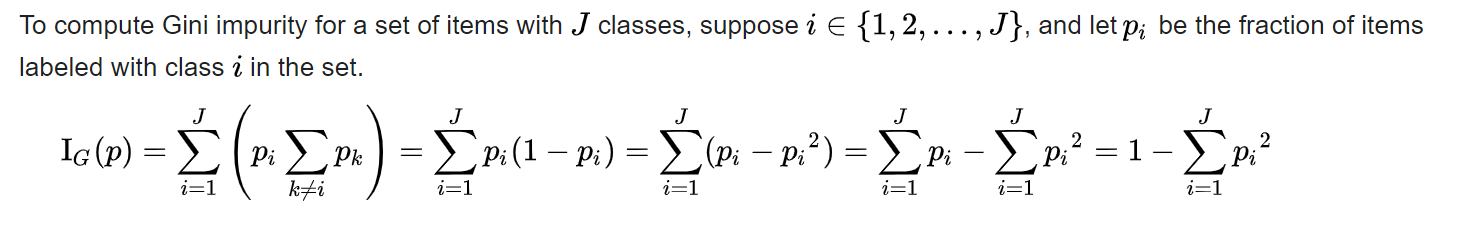

In [15]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [16]:
# Demo:
# Examples to understand how Gini Impurity works.
#
# First, we'll look at a dataset with no mixing.
no_mixing = [['Apple'],
              ['Apple']]
# This will return 0
gini(no_mixing)

0.0

In [17]:
# Now, we'll look at dataset with a 50:50 apples:oranges ratio
some_mixing = [['Apple'],
               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
gini(some_mixing)

0.5

In [18]:
# Now, we'll look at a dataset with many different labels
lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
# This will return 0.8
gini(lots_of_mixing)
#######

0.7999999999999998

In [19]:
def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [20]:
# Demo:
# Calculate the uncertainy of our training data.
current_uncertainty = gini(training_data)
current_uncertainty

0.7799999999999999

In [21]:
# How much information do we gain by partioning on 'Yellow'?
true_rows, false_rows = partition(training_data, Question(0, 'Yellow'))
info_gain(true_rows, false_rows, current_uncertainty)

0.06571428571428573

In [22]:

# What about if we partioned on 'Red' instead?
true_rows, false_rows = partition(training_data, Question(0,'Red'))
info_gain(true_rows, false_rows, current_uncertainty)

0.13238095238095238

In [23]:
# It looks like we learned more using 'Red' (0.13), than 'Green' (0.06).
# Why? Look at the different splits that result, and see which one
# looks more 'unmixed' to you.
true_rows, false_rows = partition(training_data, Question(0,'Red'))

# Here, the true_rows contain only 'Grapes'.
true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape'], ['Red', 4, 'Mango']]

In [24]:
# And the false rows contain four types of fruit. Not too bad.
false_rows

[['Green', 3, 'Apple'],
 ['Yellow', 3, 'Apple'],
 ['Yellow', 3, 'Lemon'],
 ['Green', 10, 'Watermelon'],
 ['Green', 4, 'Mango'],
 ['Green', 9, 'Watermelon'],
 ['Yellow', 5, 'Mango']]

In [25]:
# On the other hand, partitioning by Green doesn't help so much.
true_rows, false_rows = partition(training_data, Question(0,'Yellow'))

# We've isolated one apple in the true rows.
true_rows

[['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon'], ['Yellow', 5, 'Mango']]

In [26]:
# But, the false-rows are badly mixed up.
false_rows

[['Green', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Green', 10, 'Watermelon'],
 ['Green', 4, 'Mango'],
 ['Green', 9, 'Watermelon'],
 ['Red', 4, 'Mango']]

In [27]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [28]:
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data)
best_question

Is diameter >= 4 ?

In [29]:

class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [30]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [31]:
def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [32]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [33]:
tree = build_tree(training_data)

In [34]:
print_tree(tree)

Is diameter >= 4 ?
--> True:
  Is diameter >= 9 ?
  --> True:
    Predict defaultdict(<class 'int'>, {'Watermelon': 2})
  --> False:
    Predict defaultdict(<class 'int'>, {'Mango': 3})
--> False:
  Is diameter >= 3 ?
  --> True:
    Is color == Yellow ?
    --> True:
      Predict defaultdict(<class 'int'>, {'Apple': 1, 'Lemon': 1})
    --> False:
      Predict defaultdict(<class 'int'>, {'Apple': 1})
  --> False:
    Predict defaultdict(<class 'int'>, {'Grape': 2})


In [35]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [36]:
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.
classify(training_data[0], tree)

defaultdict(int, {'Apple': 1})

In [37]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [38]:
print_leaf(classify(training_data[0], tree))

{'Apple': '100%'}

In [39]:
# Evaluate
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
    ['Green', 10, 'Watermelon'],
    ['Orange', 4, 'Mango'],
    ['Green', 9, 'Watermelon'],
    ['Green', 5, 'Mango'],
]

In [40]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Mango': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Watermelon. Predicted: {'Watermelon': '100%'}
Actual: Mango. Predicted: {'Mango': '100%'}
Actual: Watermelon. Predicted: {'Watermelon': '100%'}
Actual: Mango. Predicted: {'Mango': '100%'}
